In [430]:
import librosa
from librosa import feature
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
#import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import os
import sys
import time
from functools import reduce
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

## Valve merging of 6,0,-6

In [431]:
def merge_pd(machine):
    df_6dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_6dB.csv')
    df_0dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_0dB.csv')
    df_min6dB=pd.read_csv(f'/home/regis/Desktop/machines/Codit-project/Librosa_features_{machine}_-6dB.csv')
    df_6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_0dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)
    df_min6dB.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

    df_6dB.columns = [str(col) + '_6dB' for col in df_6dB.columns]
    df_0dB.columns = [str(col) + '_0dB' for col in df_0dB.columns]
    df_min6dB.columns = [str(col) + '_-6dB' for col in df_min6dB.columns]
    data_frames = [df_6dB, df_0dB, df_min6dB]
    df_merged = reduce(lambda  left,right: pd.merge(left,right,left_index=True, right_index=True,how='outer'), data_frames)
    return df_merged

In [432]:
valve=merge_pd('valve')

In [433]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'normal(0)/abnormal(1)_6dB', 'melspectrogram_0dB',
       'melspectrogram_min_0dB', 'melspectrogram_max_0dB',
       'melspectrogram_sum_0dB', 'melspectrogram_corr_0dB',
       'melspectrogram_std_0dB', 'mfcc_0dB', 'rms_0dB',
       'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'normal

In [434]:
valve.drop(columns=['normal(0)/abnormal(1)_6dB','normal(0)/abnormal(1)_0dB'],axis=1,inplace=True)

In [435]:
valve.head()

,melspectrogram_6dB,melspectrogram_min_6dB,melspectrogram_max_6dB,melspectrogram_sum_6dB,melspectrogram_corr_6dB,melspectrogram_std_6dB,mfcc_6dB,rms_6dB,spectral_centroid_6dB,spectral_bandwidth_6dB,...,spectral_flatness _-6dB,spectral_rolloff_-6dB,zero_crossing_rate_-6dB,mean harm_-6dB,mean perc_-6dB,max harm_-6dB,max perc_-6dB,min harm_-6dB,min perc_-6dB,normal(0)/abnormal(1)_-6dB
0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,1635.526256,...,0.000629,3566.218188,0.098873,-2.914727e-07,-1.149451e-06,0.024765,0.104119,-0.025627,-0.085298,0
1,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,1767.165689,...,0.000419,2937.083941,0.053674,1.012487e-06,2.031724e-06,0.030395,0.076841,-0.030091,-0.060521,0
2,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,1784.159467,...,0.000424,3644.831866,0.084243,-7.028235e-08,-1.127828e-06,0.028087,0.073661,-0.029678,-0.070317,0
3,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,1585.731245,...,0.000294,2854.123654,0.057706,9.979737e-08,7.113005e-07,0.023710,0.068743,-0.026346,-0.062864,0
4,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,1510.835471,...,0.000318,3178.745434,0.074161,-1.004464e-06,-1.443682e-06,0.029470,0.086958,-0.028582,-0.074641,0


In [436]:
valve.rename(columns={'normal(0)/abnormal(1)_-6dB': 'normal(0)/abnormal(1)'}, inplace=True)

In [437]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

In [438]:
y=valve['normal(0)/abnormal(1)'].values
X=valve.drop(columns=['normal(0)/abnormal(1)'], axis=1)

In [439]:
#Choosing 80% as training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [440]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [441]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))
print('accuracy score')
print(accuracy_score(y_test, y_pred))

confusion matrix
[[743   2]
 [ 34  55]]
classification report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       745
           1       0.96      0.62      0.75        89

    accuracy                           0.96       834
   macro avg       0.96      0.81      0.86       834
weighted avg       0.96      0.96      0.95       834

accuracy score
0.9568345323741008


In [442]:
x_columns=list(X.columns)

Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 5.74702
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 5.59555
Feature: 17,	 Name: max perc_6dB, 	 Score: 12.76676
Feature: 19,	 Name: min perc_6dB, 	 Score: 6.01514
Feature: 24,	 Name: melspectrogram_corr_0dB, 	 Score: 3.44088
Feature: 37,	 Name: max perc_0dB, 	 Score: 9.62512
Feature: 39,	 Name: min perc_0dB, 	 Score: 6.15593
Feature: 57,	 Name: max perc_-6dB, 	 Score: 7.20244
Feature: 59,	 Name: min perc_-6dB, 	 Score: 4.96249


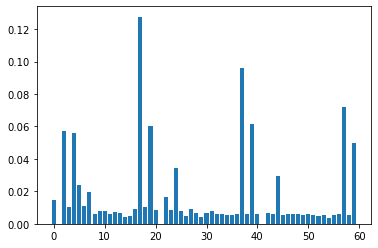

In [443]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v*100 > 3:
        print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

## Random Forest with removal of features

In [444]:
X.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 5.74702
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 5.59555
Feature: 5,	 Name: melspectrogram_std_6dB, 	 Score: 2.36287
Feature: 17,	 Name: max perc_6dB, 	 Score: 12.76676
Feature: 19,	 Name: min perc_6dB, 	 Score: 6.01514
Feature: 24,	 Name: melspectrogram_corr_0dB, 	 Score: 3.44088
Feature: 37,	 Name: max perc_0dB, 	 Score: 9.62512
Feature: 39,	 Name: min perc_0dB, 	 Score: 6.15593
Feature: 44,	 Name: melspectrogram_corr_-6dB, 	 Score: 2.93648
Feature: 57,	 Name: max perc_-6dB, 	 Score: 7.20244
Feature: 59,	 Name: min perc_-6dB, 	 Score: 4.96249


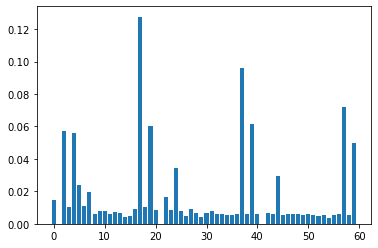

In [445]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    if v*100 > 2:
        print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
    else:
        unimportant_columns.append(x_columns[i])
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()
y=valve['normal(0)/abnormal(1)'].values
X=valve.drop(columns=unimportant_columns, axis=1)

In [446]:
X.columns

Index(['melspectrogram_max_6dB', 'melspectrogram_corr_6dB',
       'melspectrogram_std_6dB', 'max perc_6dB', 'min perc_6dB',
       'melspectrogram_corr_0dB', 'max perc_0dB', 'min perc_0dB',
       'melspectrogram_corr_-6dB', 'max perc_-6dB', 'min perc_-6dB',
       'normal(0)/abnormal(1)'],
      dtype='object')

In [447]:
#Choosing 80% as training data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [448]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

Feature: 0,	 Name: melspectrogram_6dB, 	 Score: 2.86639
Feature: 1,	 Name: melspectrogram_min_6dB, 	 Score: 3.01179
Feature: 2,	 Name: melspectrogram_max_6dB, 	 Score: 1.20750
Feature: 3,	 Name: melspectrogram_sum_6dB, 	 Score: 8.57314
Feature: 4,	 Name: melspectrogram_corr_6dB, 	 Score: 3.54904
Feature: 5,	 Name: melspectrogram_std_6dB, 	 Score: 1.74446
Feature: 6,	 Name: mfcc_6dB, 	 Score: 5.48702
Feature: 7,	 Name: rms_6dB, 	 Score: 2.32885
Feature: 8,	 Name: spectral_centroid_6dB, 	 Score: 0.70952
Feature: 9,	 Name: spectral_bandwidth_6dB, 	 Score: 2.52218
Feature: 10,	 Name: spectral_contrast_6dB, 	 Score: 1.33329
Feature: 11,	 Name: spectral_flatness _6dB, 	 Score: 66.66682


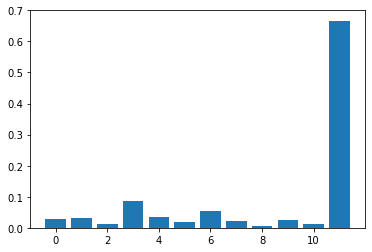

In [449]:
# get importance
unimportant_columns =[]

importance = classifier.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print(f'Feature: %0d,\t Name: {x_columns[i]}, \t Score: %.5f' % (i,v*100))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [429]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('classification report')
print(classification_report(y_test, y_pred))
print('accuracy score')
print(accuracy_score(y_test, y_pred))

confusion matrix
[[745   0]
 [  0  89]]
classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       745
           1       1.00      1.00      1.00        89

    accuracy                           1.00       834
   macro avg       1.00      1.00      1.00       834
weighted avg       1.00      1.00      1.00       834

accuracy score
1.0


## KFold

In [291]:
valve=merge_pd('valve')

In [292]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'normal(0)/abnormal(1)_6dB', 'melspectrogram_0dB',
       'melspectrogram_min_0dB', 'melspectrogram_max_0dB',
       'melspectrogram_sum_0dB', 'melspectrogram_corr_0dB',
       'melspectrogram_std_0dB', 'mfcc_0dB', 'rms_0dB',
       'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'normal

In [293]:
valve.drop(columns=['normal(0)/abnormal(1)_6dB','normal(0)/abnormal(1)_0dB'],axis=1,inplace=True)

In [148]:
valve.head()

,melspectrogram_6dB,melspectrogram_min_6dB,melspectrogram_max_6dB,melspectrogram_sum_6dB,melspectrogram_corr_6dB,melspectrogram_std_6dB,mfcc_6dB,rms_6dB,spectral_centroid_6dB,spectral_bandwidth_6dB,...,spectral_flatness _-6dB,spectral_rolloff_-6dB,zero_crossing_rate_-6dB,mean harm_-6dB,mean perc_-6dB,max harm_-6dB,max perc_-6dB,min harm_-6dB,min perc_-6dB,normal(0)/abnormal(1)_-6dB
0,0.006300,6.218734e-10,0.090277,347.580261,0.523183,0.010437,-15.342528,0.002967,1399.372425,1635.526256,...,0.000629,3566.218188,0.098873,-2.914727e-07,-1.149451e-06,0.024765,0.104119,-0.025627,-0.085298,0
1,0.007236,7.803309e-10,0.087623,399.178070,0.461858,0.009354,-14.877153,0.002920,1765.622412,1767.165689,...,0.000419,2937.083941,0.053674,1.012487e-06,2.031724e-06,0.030395,0.076841,-0.030091,-0.060521,0
2,0.006186,6.056689e-10,0.092516,341.284851,0.494020,0.008715,-16.809891,0.002680,1716.821280,1784.159467,...,0.000424,3644.831866,0.084243,-7.028235e-08,-1.127828e-06,0.028087,0.073661,-0.029678,-0.070317,0
3,0.006994,6.636679e-10,0.097133,385.858826,0.489502,0.009895,-15.353941,0.002953,1466.548926,1585.731245,...,0.000294,2854.123654,0.057706,9.979737e-08,7.113005e-07,0.023710,0.068743,-0.026346,-0.062864,0
4,0.005965,5.532336e-10,0.119931,329.072296,0.520290,0.010416,-15.100811,0.002925,1267.393978,1510.835471,...,0.000318,3178.745434,0.074161,-1.004464e-06,-1.443682e-06,0.029470,0.086958,-0.028582,-0.074641,0


In [149]:
valve.rename(columns={'normal(0)/abnormal(1)_-6dB': 'normal(0)/abnormal(1)'}, inplace=True)

In [36]:
valve.columns

Index(['melspectrogram_6dB', 'melspectrogram_min_6dB',
       'melspectrogram_max_6dB', 'melspectrogram_sum_6dB',
       'melspectrogram_corr_6dB', 'melspectrogram_std_6dB', 'mfcc_6dB',
       'rms_6dB', 'spectral_centroid_6dB', 'spectral_bandwidth_6dB',
       'spectral_contrast_6dB', 'spectral_flatness _6dB',
       'spectral_rolloff_6dB', 'zero_crossing_rate_6dB', 'mean harm_6dB',
       'mean perc_6dB', 'max harm_6dB', 'max perc_6dB', 'min harm_6dB',
       'min perc_6dB', 'melspectrogram_0dB', 'melspectrogram_min_0dB',
       'melspectrogram_max_0dB', 'melspectrogram_sum_0dB',
       'melspectrogram_corr_0dB', 'melspectrogram_std_0dB', 'mfcc_0dB',
       'rms_0dB', 'spectral_centroid_0dB', 'spectral_bandwidth_0dB',
       'spectral_contrast_0dB', 'spectral_flatness _0dB',
       'spectral_rolloff_0dB', 'zero_crossing_rate_0dB', 'mean harm_0dB',
       'mean perc_0dB', 'max harm_0dB', 'max perc_0dB', 'min harm_0dB',
       'min perc_0dB', 'melspectrogram_-6dB', 'melspectrogram_min_

In [37]:
y=valve['normal(0)/abnormal(1)'].values
X=valve.drop(columns=['normal(0)/abnormal(1)'], axis=1)

In [38]:
kf = KFold(n_splits=5)

In [39]:
kf.get_n_splits(X)

5

In [40]:
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


In [41]:
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 834  835  836 ... 4167 4168 4169] TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 2

KeyError: "None of [Int64Index([ 834,  835,  836,  837,  838,  839,  840,  841,  842,  843,\n            ...\n            4160, 4161, 4162, 4163, 4164, 4165, 4166, 4167, 4168, 4169],\n           dtype='int64', length=3336)] are in the [columns]"

In [29]:
# Lets split the data into 5 folds. 
# We will use this 'kf'(StratiFiedKFold splitting stratergy) object as input to cross_val_score() method
# The folds are made by preserving the percentage of samples for each class.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1
    
# Note that: 
# cross_val_score() parameter 'cv' will by default use StratifiedKFold spliting startergy if we just specify value of number of folds. 
# So you can bypass above step and just specify cv= 5 in cross_val_score() function

Fold:1, Train set: 3336, Test set:834
Fold:2, Train set: 3336, Test set:834
Fold:3, Train set: 3336, Test set:834
Fold:4, Train set: 3336, Test set:834
Fold:5, Train set: 3336, Test set:834


In [30]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 42), X, y, cv= kf, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.96642686 0.95323741 0.96043165 0.94964029 0.94964029]
Average score: 0.96
